In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# part a

In [ ]:
# Load the dataset
data = pd.read_csv('./dataset_i.csv')

# Filter data for classes 0 and 1
data_a = data[data['label'] <= 1]
X_a = data_a[['feature1', 'feature2']].values
y_a = data_a['label'].values

In [3]:
# Fisher's Linear Discriminant
def fisher_linear_discriminant(X, y):
    class_0 = X[y == 0]
    class_1 = X[y == 1]
    mean_0 = np.mean(class_0, axis=0)
    mean_1 = np.mean(class_1, axis=0)
    S_w = np.dot((class_0 - mean_0).T, (class_0 - mean_0)) + np.dot((class_1 - mean_1).T, (class_1 - mean_1))
    w = np.linalg.inv(S_w).dot(mean_1 - mean_0)
    b = -np.dot(w, (mean_0 + mean_1) / 2)
    return w, b

In [4]:
# Perceptron
def perceptron(X, y, epochs=100, lr=0.01):
    w = np.zeros(X.shape[1])
    b = 0
    for _ in range(epochs):
        for i in range(len(y)):
            if y[i] * (np.dot(X[i], w) + b) <= 0:
                w += lr * y[i] * X[i]
                b += lr * y[i]
    return w, b

In [5]:
# Least Squares
def least_squares(X, y):
    X_bias = np.c_[X, np.ones(X.shape[0])]  # Add bias term
    wb = np.linalg.pinv(X_bias).dot(y)
    return wb[:-1], wb[-1]

In [6]:
# Compute Fisher's Linear Discriminant
w_fisher_a, b_fisher_a = fisher_linear_discriminant(X_a, y_a)
fisher_treshold_a = np.mean(X_a.dot(w_fisher_a) + b_fisher_a)
fisher_predictions_a = (X_a.dot(w_fisher_a) + b_fisher_a > fisher_treshold_a).astype(int)
accuracy_fisher_a = np.mean(fisher_predictions_a == y_a) 

In [7]:
y_perceptron_a = np.where(y_a == 0, -1, 1)  # Change labels to -1 and 1 for perceptron
w_perceptron_a, b_perceptron_a = perceptron(X_a, y_perceptron_a)
perceptron_treshold_a = np.mean(X_a.dot(w_perceptron_a) + b_perceptron_a)
perceptron_predictions_a = (X_a.dot(w_perceptron_a) + b_perceptron_a > perceptron_treshold_a).astype(int)
accuracy_perceptron_a = np.mean(perceptron_predictions_a == y_a)

In [8]:
w_ls_a, b_ls_a = least_squares(X_a, y_a)
ls_treshold_a = np.mean(X_a.dot(w_ls_a) + b_ls_a)
least_squares_predictions_a = (X_a.dot(w_ls_a) + b_ls_a > ls_treshold_a).astype(int)
accuracy_ls_a = np.mean(least_squares_predictions_a == y_a)

In [9]:
# Display accuracy table
accuracy_df_a = pd.DataFrame({
    "Classifier": ["Fisher", "Perceptron", "Least Squares"],
    "Accuracy": [accuracy_fisher_a, accuracy_perceptron_a, accuracy_ls_a],
})
print("Accuracy Comparison:\n", accuracy_df_a)

Accuracy Comparison:
       Classifier  Accuracy
0         Fisher       1.0
1     Perceptron       1.0
2  Least Squares       1.0


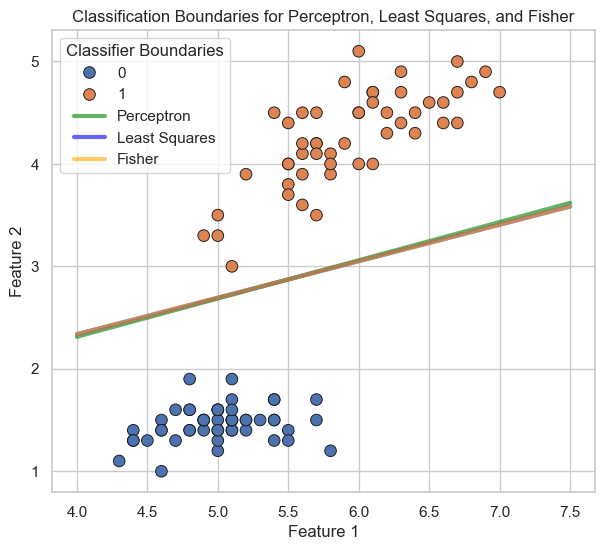

In [10]:
# Define the function to plot decision boundary lines
def plot_line(weight, bias, threshold, label, color):
    x_vals = np.array([4, 7.5])
    y_vals = -(weight[0] * x_vals + bias - threshold) / weight[1]
    plt.plot(x_vals, y_vals, label=label, color=color, alpha=0.6, lw=3)

# Set up the Seaborn style and color palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("coolwarm", as_cmap=True)
# Create the plot with Seaborn's scatterplot and overlay the decision boundaries
plt.figure(figsize=(7, 6))
# Use Seaborn scatterplot with color mapping
scatter = sns.scatterplot(x=X_a[:, 0], y=X_a[:, 1], hue=y_a, edgecolor='k', s=70, legend="full")
# Plot each classifier's decision boundary
plot_line(w_perceptron_a, b_perceptron_a, perceptron_treshold_a, 'Perceptron', 'green')
plot_line(w_ls_a, b_ls_a, ls_treshold_a, 'Least Squares', 'blue')
plot_line(w_fisher_a, b_fisher_a, fisher_treshold_a, 'Fisher', 'orange')
# Customize the legend
plt.legend(title="Classifier Boundaries")
# Label axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Boundaries for Perceptron, Least Squares, and Fisher')
# Display the plot
plt.show()

# part b

In [11]:
# Filter data for classes 1 and 2
data_b = data[data['label'] >= 1]
X_b = data_b[['feature1', 'feature2']].values
y_b = data_b['label'].values

# Re-label class 1 as 0 and class 2 as 1 for binary classification
y_b = np.where(y_b == 1, 0, 1)

In [12]:
# Fisher's Linear Discriminant for classes 1 and 2
w_fisher_b, b_fisher_b = fisher_linear_discriminant(X_b, y_b)
fisher_treshold_b = np.mean(X_b.dot(w_fisher_b) + b_fisher_b)
fisher_predictions_b = (X_b.dot(w_fisher_b) + b_fisher_b > fisher_treshold_b).astype(int)
accuracy_fisher_b = np.mean(fisher_predictions_b == y_b) 

In [13]:
# Perceptron for classes 1 and 2
y_perceptron_b = np.where(y_b == 0, -1, 1)  # Convert labels to -1 and 1 for perceptron
w_perceptron_b, b_perceptron_b = perceptron(X_b, y_perceptron_b)
perceptron_treshold_b = np.mean(X_b.dot(w_perceptron_b) + b_perceptron_b)
perceptron_predictions_b = (X_b.dot(w_perceptron_b) + b_perceptron_b > perceptron_treshold_b).astype(int)
accuracy_perceptron_b = np.mean(perceptron_predictions_b == y_b)

In [14]:
# Least Squares for classes 1 and 2
w_ls_b, b_ls_b = least_squares(X_b, y_b)
ls_treshold_b = np.mean(X_b.dot(w_ls_b) + b_ls_b)
least_squares_predictions_b = (X_b.dot(w_ls_b) + b_ls_b > ls_treshold_b).astype(int)
accuracy_ls_b = np.mean(least_squares_predictions_b == y_b)

In [15]:
# Display accuracy table for part (b)
accuracy_df_b = pd.DataFrame({
    "Classifier": ["Fisher (Classes 1 & 2)", "Perceptron (Classes 1 & 2)", "Least Squares (Classes 1 & 2)"],
    "Accuracy": [accuracy_fisher_b, accuracy_perceptron_b, accuracy_ls_b]
})
print("Accuracy Comparison for Part (b):\n", accuracy_df_b)


Accuracy Comparison for Part (b):
                       Classifier  Accuracy
0         Fisher (Classes 1 & 2)      0.94
1     Perceptron (Classes 1 & 2)      0.93
2  Least Squares (Classes 1 & 2)      0.94


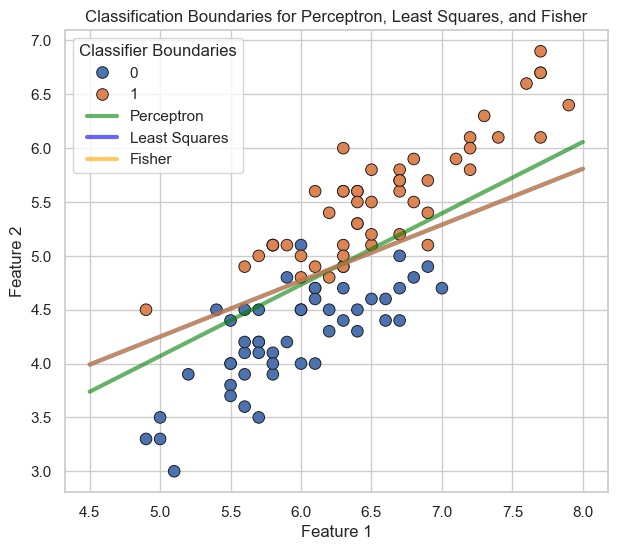

In [16]:
# Define the function to plot decision boundary lines
def plot_line(weight, bias, threshold, label, color):
    x_vals = np.array([4.5, 8])
    y_vals = -(weight[0] * x_vals + bias - threshold) / weight[1]
    plt.plot(x_vals, y_vals, label=label, color=color, alpha=0.6, lw=3)

# Set up the Seaborn style and color palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("coolwarm", as_cmap=True)
# Create the plot with Seaborn's scatterplot and overlay the decision boundaries
plt.figure(figsize=(7, 6))
# Use Seaborn scatterplot with color mapping
scatter = sns.scatterplot(x=X_b[:, 0], y=X_b[:, 1], hue=y_b, edgecolor='k', s=70, legend="full")
# Plot each classifier's decision boundary
plot_line(w_perceptron_b, b_perceptron_b, perceptron_treshold_b, 'Perceptron', 'green')
plot_line(w_ls_b, b_ls_b, ls_treshold_b, 'Least Squares', 'blue')
plot_line(w_fisher_b, b_fisher_b, fisher_treshold_b, 'Fisher', 'orange')
# Customize the legend
plt.legend(title="Classifier Boundaries")
# Label axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Boundaries for Perceptron, Least Squares, and Fisher')
# Display the plot
plt.show()

# part d

In [17]:
# Logistic Regression for Classes 0 and 1
logistic_clf_a = LogisticRegression()
logistic_clf_a.fit(X_a, y_a)
logistic_predictions_a = logistic_clf_a.predict(X_a)
accuracy_logistic_a = accuracy_score(y_a, logistic_predictions_a)

In [18]:
# Logistic Regression for Classes 1 and 2
logistic_clf_b = LogisticRegression()
logistic_clf_b.fit(X_b, y_b)
logistic_predictions_b = logistic_clf_b.predict(X_b)
accuracy_logistic_b = accuracy_score(y_b, logistic_predictions_b)

In [19]:
# Display accuracy comparison table
accuracy_comparison_df = pd.DataFrame({
    "Classifier": ["Fisher (Classes 0 & 1)", "Perceptron (Classes 0 & 1)", "Least Squares (Classes 0 & 1)", "Logistic (Classes 0 & 1)",
                   "Fisher (Classes 1 & 2)", "Perceptron (Classes 1 & 2)", "Least Squares (Classes 1 & 2)", "Logistic (Classes 1 & 2)"],
    "Accuracy": [accuracy_fisher_a, accuracy_perceptron_a, accuracy_ls_a, accuracy_logistic_a,
                 accuracy_fisher_b, accuracy_perceptron_b, accuracy_ls_b, accuracy_logistic_b]
})

print("Accuracy Comparison:\n", accuracy_comparison_df)

Accuracy Comparison:
                       Classifier  Accuracy
0         Fisher (Classes 0 & 1)      1.00
1     Perceptron (Classes 0 & 1)      1.00
2  Least Squares (Classes 0 & 1)      1.00
3       Logistic (Classes 0 & 1)      1.00
4         Fisher (Classes 1 & 2)      0.94
5     Perceptron (Classes 1 & 2)      0.93
6  Least Squares (Classes 1 & 2)      0.94
7       Logistic (Classes 1 & 2)      0.94


# part e

In [20]:
X_all = data[['feature1', 'feature2']].values
y_all = data['label'].values

# One-hot encode the target variable
Y = np.zeros((y_all.size, y_all.max()+1))
Y[np.arange(y_all.size), y_all] = 1

# Add a column of ones to the input data (bias term)
X = np.hstack((np.ones((X_all.shape[0], 1)), X_all))

# Compute the weights using the normal equation
W = np.linalg.inv(X.T @ X) @ X.T @ Y

# Example prediction
predictions = np.argmax(X @ W, axis=1)
print(accuracy_score(y_all, predictions))

0.7933333333333333
